In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import numpy as np,matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston
boston=load_boston()

In [4]:
data = pd.DataFrame(boston.data,columns = boston.feature_names)
data['target']= boston.target

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [7]:
scaler = StandardScaler()
scaler.fit(data.drop('target',axis=1))
scaled_features = scaler.transform(data.drop('target',axis=1))

In [8]:
trans = PolynomialFeatures(degree=1)
data_new= trans.fit_transform(scaled_features)
data_new_df = pd.DataFrame(data_new,columns= ["bias","CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])
data_new_df.head()

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,1.0,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,1.0,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,1.0,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,1.0,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_new_df,data['target'],test_size=0.2,train_size=0.8)
# x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)
# x_train, x_test, y_train, y_test = train_test_split(data,data['target'],test_size=0.2,train_size=0.8)

In [10]:
def evaluate_model(x,lambdas):
    training_errors = []
    testing_errors = []
   
    
   
    for l in lambdas:
        model = Ridge(alpha=l, max_iter=10000)
        model.fit(x, y_train)
        
        training_predictions = model.predict(x)
        training_mse = mean_squared_error(y_train, training_predictions)
        training_errors.append(training_mse)
        
        
        
        #testing_predictions = model.predict(x_cv)
        testing_mse =  (-1*cross_val_score(model,x_train,y_train,scoring = 'neg_mean_squared_error', cv=4)).mean()
        testing_errors.append(testing_mse)
        
      
        
    return training_errors, testing_errors 

In [11]:
def plot_errors(lambdas, train_errors, test_errors, title):
    plt.figure(figsize=(16, 9))
    plt.plot(lambdas, test_errors, label="cv")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()
    plt.plot(lambdas, train_errors, label="train")
    plt.plot(lambdas, test_errors, label="cv")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()

In [12]:
def hypothesis (j):
    x_new = pd.DataFrame()
    for k in range (14):
        feature_name = feature_name_list[k] 
        x_new.insert(k, feature_name, np.power(x_train.iloc[:,k],j[k]), True)
    return x_new

In [13]:
feature_name_list = ["bias","CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]

    

j = [0,1,1,1,1,1,1,1,1,1,1,1,1,1] #chosen from regression model only
x = hypothesis(j)




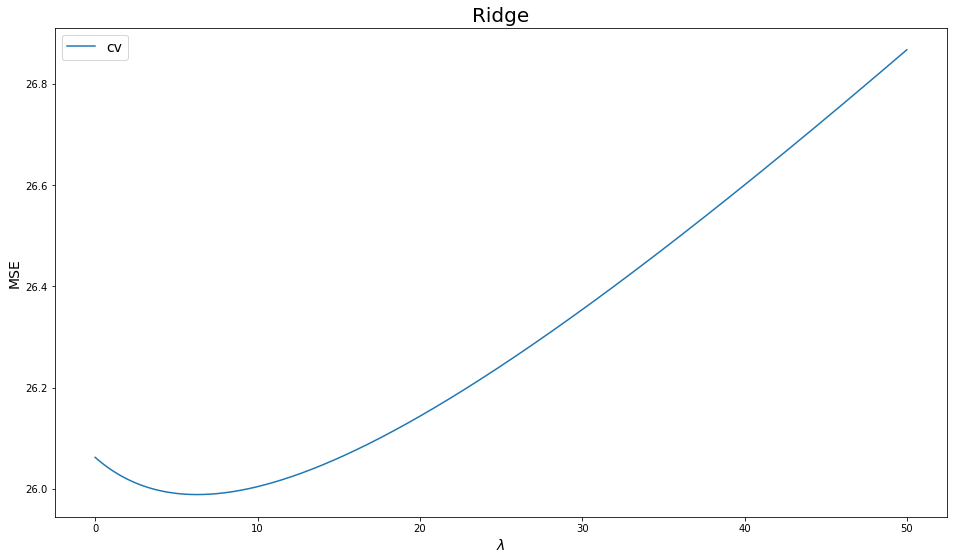

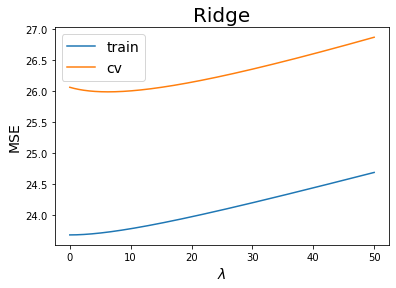

In [14]:

    lambdas= np.arange(0, 50, step=0.01)
    ridge_train, ridge_test = evaluate_model(x, lambdas)
    plot_errors(lambdas, ridge_train, ridge_test, "Ridge")


In [31]:
best_lamda = lambdas[ridge_test.index(min(ridge_test))]
best_lamda

6.28

In [32]:

model = Ridge(alpha=best_lamda, max_iter=10000)
model.fit(x, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
        

In [33]:
mse

15.622282313502794

In [34]:
r2 = model.score(x_test, y_test)

In [35]:
r2

0.770799877775781